# Title:Covid-19 World Data 
Stduent Registration No:2015331551

Problem:Predicting Coronavirus(covid-19) Recovery cases with different types of classification algorithms

In [ ]:
# Solution Steps, Code, Input Sample, Output Sample


# Import Libraries And Load Covid_19 world dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [6]:
world_data = pd.read_csv("covid-19_cleaned_data.csv(updated)")
world_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Thailand,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,Japan,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,Singapore,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,Nepal,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,Malaysia,Malaysia,2.5000,112.5000,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
31057,Jersey,Jersey,49.1900,-2.1100,2020-03-23,0,0,0
31058,Puerto Rico,Puerto Rico,18.2000,-66.5000,2020-03-23,0,1,0
31059,Republic of the Congo,Republic of the Congo,-1.4400,15.5560,2020-03-23,0,0,0
31060,The Bahamas,The Bahamas,24.2500,-76.0000,2020-03-23,0,0,0


# Exploratory Data Analysis And Data Visualization

In [3]:
world_data.shape

(31062, 8)

In [4]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31062 entries, 0 to 31061
Data columns (total 8 columns):
Province/State    31062 non-null object
Country/Region    31062 non-null object
Lat               31062 non-null float64
Long              31062 non-null float64
Date              31062 non-null object
Confirmed         31062 non-null int64
Deaths            31062 non-null int64
Recovered         31062 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.9+ MB


In [5]:
world_data['Country/Region'].value_counts()

US              15438
China            2046
Canada            744
Australia         558
France            558
                ...  
Suriname           62
Ecuador            62
Saudi Arabia       62
Qatar              62
Singapore          62
Name: Country/Region, Length: 183, dtype: int64

In [6]:
world_data.isnull()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
31057,False,False,False,False,False,False,False,False
31058,False,False,False,False,False,False,False,False
31059,False,False,False,False,False,False,False,False
31060,False,False,False,False,False,False,False,False


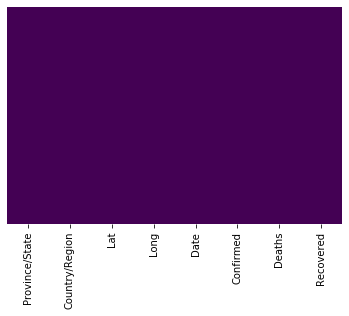

In [7]:
sns.heatmap(world_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
world_data.loc[world_data['Country/Region'] == 'Bangladesh' ]
#print(world_data.loc[world_data['Country/Region'] == 'Japan'])

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
90,Bangladesh,Bangladesh,23.685,90.3563,2020-01-22,0,0,0
591,Bangladesh,Bangladesh,23.685,90.3563,2020-01-23,0,0,0
1092,Bangladesh,Bangladesh,23.685,90.3563,2020-01-24,0,0,0
1593,Bangladesh,Bangladesh,23.685,90.3563,2020-01-25,0,0,0
2094,Bangladesh,Bangladesh,23.685,90.3563,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
28647,Bangladesh,Bangladesh,23.685,90.3563,2020-03-19,17,1,3
29148,Bangladesh,Bangladesh,23.685,90.3563,2020-03-20,20,1,3
29649,Bangladesh,Bangladesh,23.685,90.3563,2020-03-21,25,2,3
30150,Bangladesh,Bangladesh,23.685,90.3563,2020-03-22,27,2,3


In [8]:
world_data.loc[world_data['Country/Region'] == 'China' ]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
154,Hubei,China,30.9756,112.2707,2020-01-22,444,17,28
158,Guangdong,China,23.3417,113.4244,2020-01-22,26,0,0
159,Henan,China,33.8820,113.6140,2020-01-22,5,0,0
160,Zhejiang,China,29.1832,120.0934,2020-01-22,10,0,0
161,Hunan,China,27.6104,111.7088,2020-01-22,4,0,0
...,...,...,...,...,...,...,...,...
30749,Inner Mongolia,China,44.0935,113.9448,2020-03-23,75,1,74
30750,Ningxia,China,37.2692,106.1655,2020-03-23,75,0,75
30754,Qinghai,China,35.7452,95.9956,2020-03-23,18,0,18
30755,Macau,China,22.1667,113.5500,2020-03-23,24,0,10


In [9]:
countries= world_data['Country/Region'].value_counts()
countries.head()

US           15438
China         2046
Canada         744
Australia      558
France         558
Name: Country/Region, dtype: int64

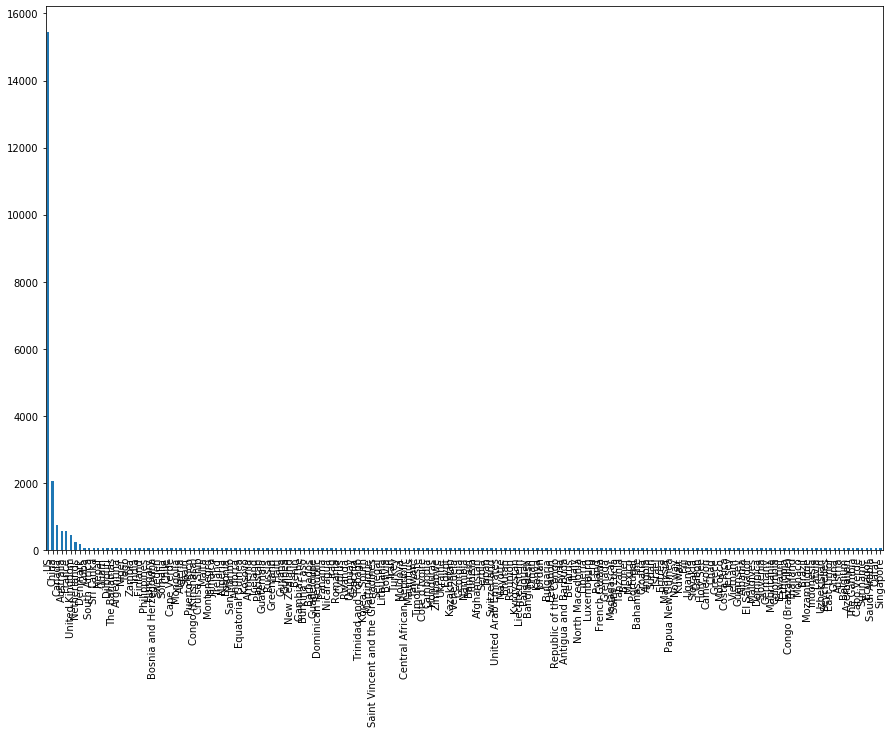

In [10]:
countries.plot(kind='bar', stacked=True, figsize=(15,10))

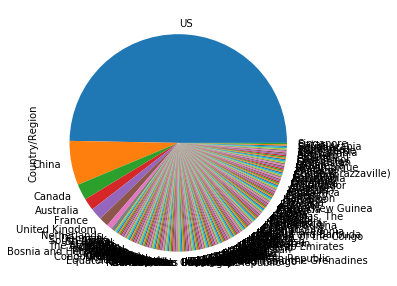

In [12]:
countries.plot(kind='pie', stacked=True, figsize=(10,5))

In [13]:
def bar_chart(feature):
    confirmed = world_data[world_data['Country/Region']=='China'][feature].value_counts()
    death = world_data[world_data['Country/Region']=='China'][feature].value_counts()
    df = pd.DataFrame([confirmed,death])
    df.index = ['Confirmed','Death']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

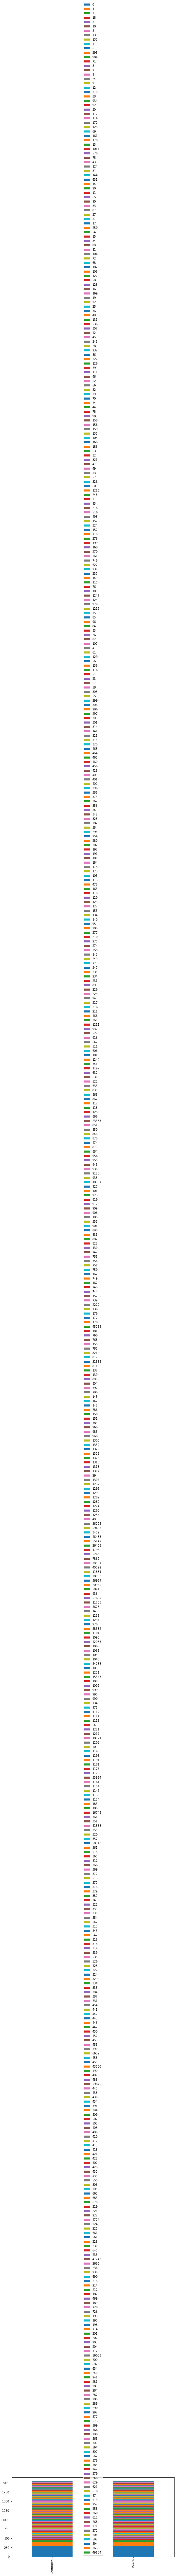

In [14]:
bar_chart('Recovered')

In [15]:
def bar_chart(feature):
    confirmed = world_data[world_data['Country/Region']=='Italy'][feature].value_counts()
    death = world_data[world_data['Country/Region']=='Italy'][feature].value_counts()
    df = pd.DataFrame([confirmed,death])
    df.index = ['Confirmed','Death']
    df.plot(kind='bar',stacked=True, figsize=(10,5))


    

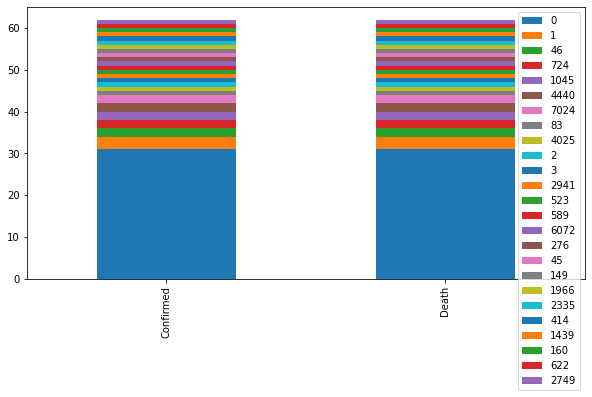

In [16]:
bar_chart('Recovered')

In [17]:
def bar_chart(feature):
    confirmed = world_data[world_data['Country/Region']=='Bangladesh'][feature].value_counts()
    death = world_data[world_data['Country/Region']=='Bangladesh'][feature].value_counts()
    df = pd.DataFrame([confirmed,death])
    df.index = ['Confirmed','Death']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

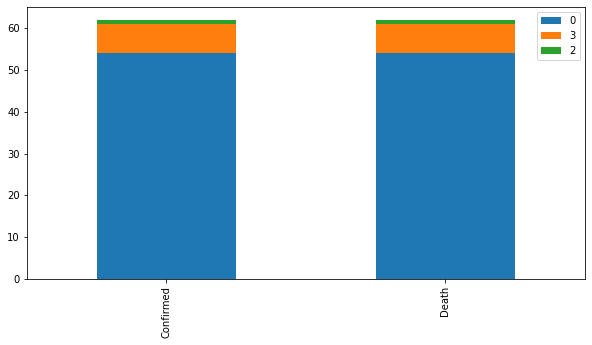

In [18]:
bar_chart('Recovered')

In [ ]:
#sns.pairplot(world_data,hue='Recovered')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


# Converting Categorical Features


In [83]:
#pd.get_dummies(world_data['Country/Region'],drop_first=True).head()

,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
''''country = pd.get_dummies(world_data['Country/Region'],drop_first=True)
state = pd.get_dummies(world_data['Province/State'],drop_first=True)'''

In [85]:
#world_data = pd.concat([world_data,country,state],axis=1)

In [ ]:
#world_data.drop(['Country/Region','Province/State'],axis=1,inplace=True)

In [19]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31062 entries, 0 to 31061
Data columns (total 8 columns):
Province/State    31062 non-null object
Country/Region    31062 non-null object
Lat               31062 non-null float64
Long              31062 non-null float64
Date              31062 non-null object
Confirmed         31062 non-null int64
Deaths            31062 non-null int64
Recovered         31062 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.9+ MB


In [20]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
 
world_data['Country/Region']= label_encoder.fit_transform(world_data['Country/Region']) 
  
world_data['Country/Region'].unique() 

array([164,  88, 150, 119, 104,  28,   8,  26, 156,  64,  58, 175, 133,
        80,  86, 159, 155,  16,  50,  98,  83, 127,   0,  12,  95,   2,
        39, 160,   9,  85, 128,  21,  63,  66, 125, 126, 140,  54, 145,
        15,  79, 101, 111, 121, 124,  84, 102, 113, 137,  49,  10,   7,
        47,  81, 135,   3,  97, 116, 146, 147,   6,  32,  90, 174,  78,
       100, 134, 170,  20, 152, 154,  18,  27,  34,  37, 132, 148, 151,
       168, 106, 107,  23, 105,  13, 131,   1,  42,  22, 172,  24,  76,
       114, 129,  33,  82,  93,  59,  40,  44,  43, 162, 180, 141, 112,
        19,  77, 176,  36,  38,  87, 171,  41,  74,  91,  56, 157,  73,
        92,   5, 177,  65, 118, 149, 169, 179,  55,  61,  71, 108, 142,
       143, 144, 158,  94,  30,  35,  52, 178, 120,  17,  99, 153, 163,
        14, 115,  96, 109, 181,  45,  62,  11,  31,  51,  57, 122, 103,
        75,   4,  25, 123, 130, 182,  29,  48,  53, 173,  46,  68, 117,
       161, 167,  69, 139,  60, 110,  67,  70,  72,  89, 136, 13

In [27]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 

world_data['Province/State']= label_encoder.fit_transform(world_data['Province/State']) 
  
world_data['Province/State'].unique()

array([437, 204, 398, 294, 251,  44, 303, 464, 361,  54, 415, 144, 129,
       455, 342, 190, 201, 428, 412, 409,  31, 114, 137, 236, 196, 327,
         1,  25, 230,   8,  86, 429,  22, 200, 332,  43, 143, 150, 317,
       320, 369, 120, 380,  30, 187, 242, 267, 306, 310, 479, 197, 246,
       276, 358, 113,  23,  19, 107, 192, 352,   9, 434, 235, 286, 387,
       388,  15,  70, 216, 451, 186, 318, 240, 349, 447,  42, 402, 408,
        38,  57,  77,  84, 340, 389, 401, 444, 253, 260,  48, 252,  26,
       335, 328,   7, 360,   6,  90,  46, 470, 304,  53, 262, 103, 148,
        78, 130, 301, 330, 436, 189, 339, 194, 261, 315, 410, 435, 467,
        16, 191, 220, 104, 296, 300, 272, 293, 323, 365, 482,  81, 171,
       325, 459,  49, 177, 277, 333, 218, 245, 274, 463,   5,  17,  98,
       188, 250, 268, 273, 280, 302, 316, 411, 477, 484, 182, 195, 228,
       133, 156, 174, 489, 185,  11, 211, 392, 210,  71, 397, 173, 100,
        29, 393, 172, 138, 157, 391, 487, 165, 161, 441, 394, 14

In [13]:
#world_data['Date_new'] = world_data['Date'].str.replace('\D', '').astype(int)
#features_drop = ['Date']
#world_data= world_data.drop(features_drop, axis=1)
                 

In [28]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
   
world_data['Date']= label_encoder.fit_transform(world_data['Date']) 
  
world_data['Date'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

In [29]:
world_data.head()



,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,437,164,15.0000,101.0000,0,2,0,0
1,204,88,36.0000,138.0000,0,2,0,0
2,398,150,1.2833,103.8333,0,0,0,0
3,294,119,28.1667,84.2500,0,0,0,0
4,251,104,2.5000,112.5000,0,0,0,0


In [30]:
world_data.drop('Recovered',axis=1).head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
0,437,164,15.0000,101.0000,0,2,0
1,204,88,36.0000,138.0000,0,2,0
2,398,150,1.2833,103.8333,0,0,0
3,294,119,28.1667,84.2500,0,0,0
4,251,104,2.5000,112.5000,0,0,0


In [31]:
world_data['Recovered'].head()

0    0
1    0
2    0
3    0
4    0
Name: Recovered, dtype: int64

# Train and Test


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(world_data.drop('Recovered',axis=1), 
                                                    world_data['Recovered'], test_size=0.30, 
                                                    random_state=101)

# Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
#train a model
log_reg.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, log_reg.predict(X_test))
#log_reg.score( X_test, y_test)

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8863611975533856

# Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, random_state=42)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9407661766283936

# K Neighbors Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 35, metric="minkowski", p=2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8905461959437708

# Support Vector Machine